In [3]:
# import libraries

import numpy as np
import pandas as pd

import sklearn
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
PROJECT_ROOT_DIR = 'images'
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH,fig_id + "."  + fig_extension)
    print("Saving Figure...")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
DATASET_PATH = 'dataset'
TRAIN_DATASET_PATH = os.path.join(DATASET_PATH, 'train.csv')
TEST_DATASET_PATH = os.path.join(DATASET_PATH, 'test.csv')

In [6]:
titanic_train = pd.read_csv(TRAIN_DATASET_PATH)
titanic_test = pd.read_csv(TEST_DATASET_PATH)

In [7]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Saving Figure...


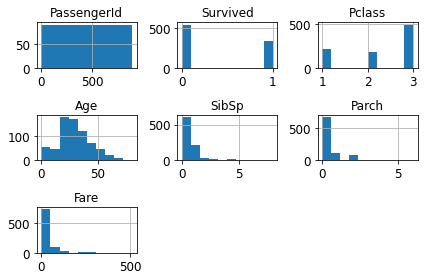

In [10]:
titanic_train.hist()
save_fig('train_test_attribute_histograms')

<AxesSubplot:>

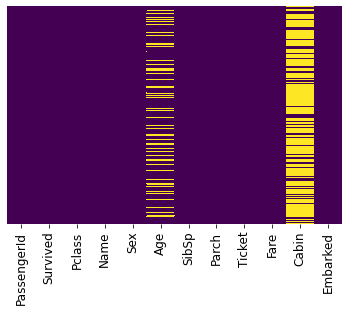

In [11]:
import seaborn as sns

#heatmap to see the null values in each column
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
# function to remove colums that are not relevant or have too much missing data

cols = ['Name', 'Embarked', 'Cabin', 'Ticket']

def cust_col_remover(X):
    new_df = X.drop(cols, axis=1)
    return new_df

In [13]:
from sklearn.preprocessing import FunctionTransformer

# transformer to remove the cols
col_remove_transformer = FunctionTransformer(cust_col_remover)


In [14]:
corr_data = titanic_train.corr()
corr_data['Age'].sort_values(ascending=False)


Age            1.000000
Fare           0.096067
PassengerId    0.036847
Survived      -0.077221
Parch         -0.189119
SibSp         -0.308247
Pclass        -0.369226
Name: Age, dtype: float64

Here we can see that the SibSp Pclass & Parch are best coreelated with age so we can use these colums to predict missing Ages.

In [15]:
# model to predict the missing ages
# we will use diffrent models to see which works best
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

age_cols = ['Pclass', 'Parch', 'SibSp', 'Age']
age_df = titanic_train[age_cols]
age_df_test = age_df[age_df['Age'].isnull()]
age_df_train = age_df.dropna()

y_train = age_df_train['Age']
X_train = age_df_train.drop("Age", axis=1)
X_test = age_df_test.drop("Age", axis=1)

<AxesSubplot:>

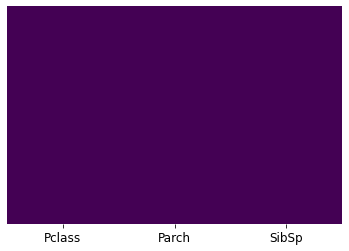

In [16]:
# to check if null values exist in train dataset
sns.heatmap(X_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
# building the 3 models
age_lr_model = LinearRegression()
age_dt_model = DecisionTreeRegressor()
age_rf_model = RandomForestRegressor()

In [20]:
# training the models
age_lr_model.fit(X_train, y_train)
age_dt_model.fit(X_train, y_train)
age_rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
from sklearn.metrics import mean_squared_error

def model_rmse_calculator(model, train_dataset, labels):
    predictions = model.predict(train_dataset)
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    return rmse

print("Linear Regression RMSE:", model_rmse_calculator(age_lr_model, X_train, y_train))
print("Decision Tree RMSE:", model_rmse_calculator(age_dt_model, X_train, y_train))
print("Random Forest RMSE:", model_rmse_calculator(age_rf_model, X_train, y_train))


Linear Regression RMSE: 12.79656695611708
Decision Tree RMSE: 11.680855912768111
Random Forest RMSE: 11.700007758885556


In [22]:
# function to display scores using cross validation
from sklearn.model_selection import cross_val_score

def display_scores(model, train_dataset, labels):
    predictions = model.predict(train_dataset)
    scores = cross_val_score(model, train_dataset, labels, scoring='neg_mean_squared_error', cv=10)
    final_scores = np.sqrt(-scores)
    print("Scores:", final_scores)
    print("Mean:", final_scores.mean())
    print("Standard Deviation", final_scores.std())
    print("/n")



In [23]:
print("Linear Regression:")
display_scores(age_lr_model, X_train, y_train)
print("Decision Tree:")
display_scores(age_dt_model, X_train, y_train)
print("Random Forest:")
display_scores(age_rf_model, X_train, y_train)

Linear Regression:
Scores: [11.78699283 13.50373253 11.86757154 13.0338663  12.4866891  12.95763343
 13.88466047 13.13537188 13.582422   12.55399349]
Mean: 12.879293356339701
Standard Deviation 0.6683818485098557
/n
Decision Tree:
Scores: [11.62214685 13.69214804 11.56317216 12.52885987 12.99080013 12.28122314
 12.74253701 13.01507385 13.33876303 11.52402005]
Mean: 12.529874412683029
Standard Deviation 0.7300911751572123
/n
Random Forest:
Scores: [11.5318359  13.45832731 11.50383603 12.52332512 12.77909285 12.28136265
 12.6866387  12.95664828 13.15427838 11.47317873]
Mean: 12.434852393411557
Standard Deviation 0.682471718773243
/n


We can see that all models perform similarly but the Random Forest Regressor is slightly better so we will be using that to predict the ages


In [24]:
age_preds = age_rf_model.predict(X_test)
titanic_train.loc[titanic_train.Age.isnull(), 'Age'] = age_preds


In [25]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cat_cols = ['Sex']
cat_pipeline = Pipeline([
    ('OEncoder', OrdinalEncoder())
])

cat_full_pipeline = ColumnTransformer([
    ('cat', cat_pipeline, cat_cols)
])



In [27]:
def prepare_train_data(train_df):
    prepared_df = col_remove_transformer.fit_transform(train_df)
    prepared_df['Sex'] = cat_full_pipeline.fit_transform(train_df)
    return prepared_df
#
prepared_train = prepare_train_data(titanic_train)

In [28]:
prepared_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    float64
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [29]:
age_pred_test = titanic_test[age_cols]
age_pred_test.info()
age_pred_test_prepared = age_pred_test[age_pred_test.Age.isnull()]
age_pred_test_prepared.info()
X_test_age = age_pred_test_prepared.drop('Age', axis=1)
X_test_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Parch   418 non-null    int64  
 2   SibSp   418 non-null    int64  
 3   Age     332 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 13.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 10 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  86 non-null     int64  
 1   Parch   86 non-null     int64  
 2   SibSp   86 non-null     int64  
 3   Age     0 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 3.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 10 to 417
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  86 non-null     int64
 1   Parch   86 non-null     int64
 2 

In [30]:
test_rf_preds = age_rf_model.predict(X_test_age)

titanic_test.loc[titanic_test.Age.isnull(), 'Age'] = test_rf_preds

In [31]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [36]:
def prepare_test_data(test_df):
    prepared_df = col_remove_transformer.transform(test_df)
    ordinal_encoder = OrdinalEncoder()
    prepared_df['Sex'] = ordinal_encoder.fit_transform(prepared_df[['Sex']])
    prepared_df['Fare'].fillna(method='ffill', inplace=True)
    return prepared_df

prepared_test = prepare_test_data(titanic_test)
prepared_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    float64
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 23.0 KB


In [37]:
X_train = prepared_train.drop('Survived', axis=1)
y_labels = prepared_train['Survived']


In [38]:
#  training an sgd model
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_labels)


SGDClassifier(random_state=42)

In [47]:
# using cross_val_score to calculate accuracy of model

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_labels, cv=10, scoring='accuracy')

array([0.57777778, 0.38202247, 0.38202247, 0.65168539, 0.38202247,
       0.37078652, 0.38202247, 0.62921348, 0.61797753, 0.48314607])

In [53]:
# using the confusion matrix

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_labels, cv=3)

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_labels, y_train_pred)

array([[501,  48],
       [264,  78]], dtype=int64)

In [58]:
# calculating precision and recall
from sklearn.metrics import precision_score, recall_score

print("Precision:",precision_score(y_labels, y_train_pred))

Precision: 0.6190476190476191


In [59]:
print("Recall:", recall_score(y_labels, y_train_pred))

Recall: 0.22807017543859648


In [61]:
# calculating F1 Score

from sklearn.metrics import f1_score

print("F1 Score:", f1_score(y_labels, y_train_pred))

F1 Score: 0.3333333333333333


In [65]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_labels, y_train_pred)


In [68]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

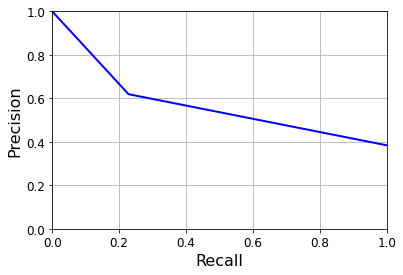

In [69]:
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [70]:
# plotting the ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_labels, y_train_pred)



In [72]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)

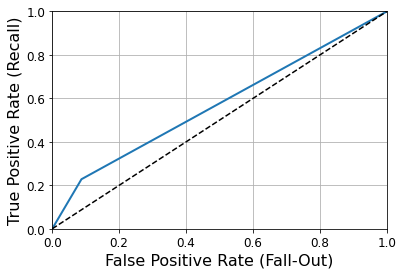

In [73]:
plot_roc_curve(fpr,tpr,label=None)
plt.show()

In [75]:
from sklearn.metrics import roc_auc_score

print("The ROC AUC Score is:", roc_auc_score(y_labels, y_train_pred))

The ROC AUC Score is: 0.5703192407247627


In [77]:
# building a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probs_forest = cross_val_predict(forest_clf, X_train, y_labels, cv=3, method='predict_proba')

In [78]:
y_predict_forest = cross_val_predict(forest_clf, X_train, y_labels, cv=3)

print("ROC AUC Score Of Random Forest:", roc_auc_score(y_labels, y_predict_forest))

ROC AUC Score Of Random Forest: 0.7925893969897421


In [79]:
print("Precision Forest:",precision_score(y_labels, y_predict_forest))
print("Recall Forest:", recall_score(y_labels, y_predict_forest))


Precision Forest: 0.7894736842105263
Recall Forest: 0.7017543859649122


In [81]:
# training the forest classifier for prediction
forest_clf.fit(X_train, y_labels)

RandomForestClassifier(random_state=42)

In [84]:
forest_clf_final_predictions = forest_clf.predict(prepared_test)

In [83]:
prepared_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1.0,34.5,0,0,7.8292
1,893,3,0.0,47.0,1,0,7.0000
2,894,2,1.0,62.0,0,0,9.6875
3,895,3,1.0,27.0,0,0,8.6625
4,896,3,0.0,22.0,1,1,12.2875


In [97]:
predictions_df = pd.DataFrame(data=forest_clf_final_predictions, columns=['Survived'])
predictions_df.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [99]:
passenger_test_ids = prepared_test[["PassengerId"]].copy()
passenger_test_ids.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [100]:
final_dataframe = pd.concat([passenger_test_ids,predictions_df], axis=1, sort=True)
final_dataframe.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [103]:
final_dataframe.to_csv('final_predictions.csv',index=False)